# MODELING

# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Read data

In [2]:
data = pd.read_csv("Clean_data.csv")

In [3]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,female,80,0,1,never,25.19,6.6,140,0
1,female,54,0,0,no info,27.32,6.6,80,0
2,male,28,0,0,never,27.32,5.7,158,0
3,female,36,0,0,current,23.45,5.0,155,0
4,male,76,1,1,current,20.14,4.8,155,0


# Perform data transformation

In [4]:
# import transformers and column transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [5]:
def transform_data(dataframe, target):
    df = dataframe.drop([target], axis =1)
    
    numerical_features = df.select_dtypes(exclude = "object").columns.to_list()
    categorical_features = df.select_dtypes(include = "object").columns.to_list()
    
    # Transformers
    numerical_transformer = MinMaxScaler()
    categorical_transformer = OneHotEncoder(drop = 'if_binary')
    
    # define column transformer object
    pipeline = ColumnTransformer(
    [
       ( "numerical transformer", numerical_transformer, numerical_features),
        ("categorical transformer", categorical_transformer, categorical_features)
    ])
    
    # apply transformer
    transformed_array = pipeline.fit_transform(df)
    
    # Get the transformed column names
    transformed_numerical_columns = pipeline.transformers_[0][2]
    transformed_categorical_columns = pipeline.transformers_[1][1].get_feature_names_out(input_features=categorical_features)
    
    # Combine numerical and categorical transformed column names
    transformed_column_names = list(transformed_numerical_columns) + list(transformed_categorical_columns)
    
    # convert array to dataframe
    transformed_data = pd.DataFrame(transformed_array, columns=transformed_column_names)
    
    
    # attach target feature
    transformed_data[target] = dataframe[target]
    
    return transformed_data

In [6]:
# transform data
transformed_data = transform_data(dataframe=data, target="diabetes")
transformed_data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_male,smoking_history_current,smoking_history_never,smoking_history_no info,smoking_history_past_smoker,diabetes
0,1.000,0.0,1.0,0.177171,0.563636,0.272727,0.0,0.0,1.0,0.0,0.0,0
1,0.675,0.0,0.0,0.202031,0.563636,0.000000,0.0,0.0,0.0,1.0,0.0,0
2,0.350,0.0,0.0,0.202031,0.400000,0.354545,1.0,0.0,1.0,0.0,0.0,0
3,0.450,0.0,0.0,0.156863,0.272727,0.340909,0.0,1.0,0.0,0.0,0.0,0
4,0.950,1.0,1.0,0.118231,0.236364,0.340909,1.0,1.0,0.0,0.0,0.0,0


# Modeling

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

In [8]:
# write a function to search for baseline model

def base_line_model(data_frame, target):
    #split data into X and y
    X_data = data_frame.drop([target],axis = 1)
    y_data = data_frame[target]

    # Assuming X and y into train and test, add stratify = y_data to make sure the imbalance nature of target is considered
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42, stratify=y_data)


    # Define classifiers
    classifiers = {
        'Logistics Regression': LogisticRegression(),
        'Decision tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'XGBoost': XGBClassifier()
    }

    # FIT models
    for classifier_name, classifier in classifiers.items():
        precision = []
        recall = []
        accuracy = []
        f1 = []
        print(f"\nResults for {classifier_name}:\n")

        # Train the classifier
        clss = classifier
        clss.fit(X_train, y_train)

        # Make predictions on Train
        y_train_pred = clss.predict(X_train)

        # Make predictions on Test
        y_pred = clss.predict(X_test)

        # Train info: Calculate and print metrics
        Train_accuracy = accuracy_score(y_train, y_train_pred)
        Train_precision = precision_score(y_train, y_train_pred)
        Train_recall = recall_score(y_train, y_train_pred)
        Train_f1 = f1_score(y_train, y_train_pred)


        # Test info: Calculate and print metrics
        Test_accuracy = accuracy_score(y_test, y_pred)
        Test_precision = precision_score(y_test, y_pred)
        Test_recall = recall_score(y_test, y_pred)
        Test_f1 = f1_score(y_test, y_pred)

        # print train result
        print(f"\n Results from Train:")
        print(f"Accuracy: {Train_accuracy:.4f}")
        
        print(f"Precision: {Train_precision:.4f}")
        print(f"Recall: {Train_recall:.4f}")
        print(f"F1 Score: {Train_f1:.4f}")

        # print test result
        print(f"\n Results from Test:")
        print(f"Accuracy: {Test_accuracy:.4f}")
        print(f"Precision: {Test_precision:.4f}")
        print(f"Recall: {Test_recall:.4f}")
        print(f"F1 Score: {Test_f1:.4f}")

In [9]:
base_line_model(data_frame= transformed_data, target="diabetes")


Results for Logistics Regression:


 Results from Train:
Accuracy: 0.9586
Precision: 0.8681
Recall: 0.6267
F1 Score: 0.7279

 Results from Test:
Accuracy: 0.9590
Precision: 0.8793
Recall: 0.6215
F1 Score: 0.7282

Results for Decision tree:


 Results from Train:
Accuracy: 0.9993
Precision: 1.0000
Recall: 0.9916
F1 Score: 0.9958

 Results from Test:
Accuracy: 0.9487
Precision: 0.6964
Recall: 0.7449
F1 Score: 0.7198

Results for Random Forest:


 Results from Train:
Accuracy: 0.9992
Precision: 0.9992
Recall: 0.9923
F1 Score: 0.9957

 Results from Test:
Accuracy: 0.9692
Precision: 0.9433
Recall: 0.6934
F1 Score: 0.7993

Results for XGBoost:


 Results from Train:
Accuracy: 0.9746
Precision: 0.9864
Recall: 0.7225
F1 Score: 0.8341

 Results from Test:
Accuracy: 0.9710
Precision: 0.9592
Recall: 0.7020
F1 Score: 0.8107


**Observations**
- Logistic Regression shows stable performance but has lower recall, meaning it could miss more true positives.
- Decision Tree significantly overfits the training data, leading to poor generalization.
- Random Forest performs better than the Decision Tree on the test set, with high precision but a drop in recall.
- XGBoost provides the **best balance between training and testing performance**, with **high F1 score**, making it the most reliable model among the four for this task.

# Optimize XGBoost Model to improve recall

XGBoost creates a series of these small trees, one after another. Each tree helps improve the accuracy of the final prediction by focusing on correcting the mistakes made by the previous trees.

In simple terms, think of it like this: XGBoost is like a team of trees working together. Each tree tries to fix the errors of the trees before it, and together, they make a strong and accurate prediction.

**Some XGBoost hyper-parameters:**

**colsample_bytree:**
- Default Value: 1.0
- What it does: Controls the percentage of features (columns) used by each tree in the model.
- Why it matters: Reducing the number of features helps prevent overfitting and can speed up training.

**learning_rate (also called eta):**
- Default Value: 0.3
- What it does: Controls how much each tree contributes to the final prediction.
- Why it matters: Lower values make the model learn more slowly and carefully, often leading to better results, but may require more trees (n_estimators).

**max_depth:**
- Default Value: 6
- What it does: Sets the maximum depth of each tree (how many splits it can make).
- Why it matters: Deeper trees can model more complex relationships but might overfit. Shallower trees are simpler and less prone to overfitting.

**n_estimators:**
- Default Value: 100
- What it does: Determines the number of trees (boosting rounds) the model will build.
- Why it matters: More trees can improve accuracy but also increase the risk of overfitting and slow down training.

**scale_pos_weight:**
- Default Value: 1
- What it does: Balances the weight of positive and negative classes in imbalanced datasets.
- Why it matters: Useful when you have more negatives than positives (e.g., more healthy people than those with diabetes).

**subsample:**
- Default Value: 1.0
- What it does: Controls the percentage of training data used to build each tree.
- Why it matters: Helps prevent overfitting by introducing randomness, making the model more robust.

In [10]:
def exp_1(data, target, param_dict = {}):
    # Split data into X and y
    X_data = data.drop([target], axis=1)
    y_data = data[target]

    # Split data into train and final test set
    X_train_val, X_test, y_train_val, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

    # Split the training data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)
    # Resulting in 60% train, 20% validation, 20% test

    # Initialize classifier
    clf = XGBClassifier(**param_dict)

    # Fit to data using validation set for eval_set
    clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=50)
    
    # Plot the log loss for training and validation sets
    evals_result = clf.evals_result()
    epochs = len(evals_result['validation_0']['logloss'])
    x_axis = range(0, epochs)

    plt.figure(figsize=(10, 6))
    plt.plot(x_axis, evals_result['validation_0']['logloss'], label='Train Log Loss')
    plt.plot(x_axis, evals_result['validation_1']['logloss'], label='Validation Log Loss')
    plt.xlabel('Boosting Rounds')
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss Over Boosting Rounds')
    plt.legend()
    plt.grid(True)
    plt.show()


    # Predict on train and validation data
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)

    # Predict on the separate test data
    y_test_pred = clf.predict(X_test)

    predict_dict = {
        "train": [y_train, y_train_pred],
        "validation": [y_val, y_val_pred],
        "test": [y_test, y_test_pred]
    }
    
    # print out the final train, test and evaluation result
    for key, value in predict_dict.items():
        print(f"Results for {key}")
        print(f"{key} accuracy = {accuracy_score(value[0], value[1]):.4f}")
        print(f"{key} precision = {precision_score(value[0], value[1]):.4f}")
        print(f"{key} recall = {recall_score(value[0], value[1]):.4f}")
        print(f"{key} f1 = {f1_score(value[0], value[1]):.4f}")
        print("------------------------------------------")


# Test 1

[0]	validation_0-logloss:0.21241	validation_1-logloss:0.21431
[50]	validation_0-logloss:0.07233	validation_1-logloss:0.08734
[99]	validation_0-logloss:0.06126	validation_1-logloss:0.09120


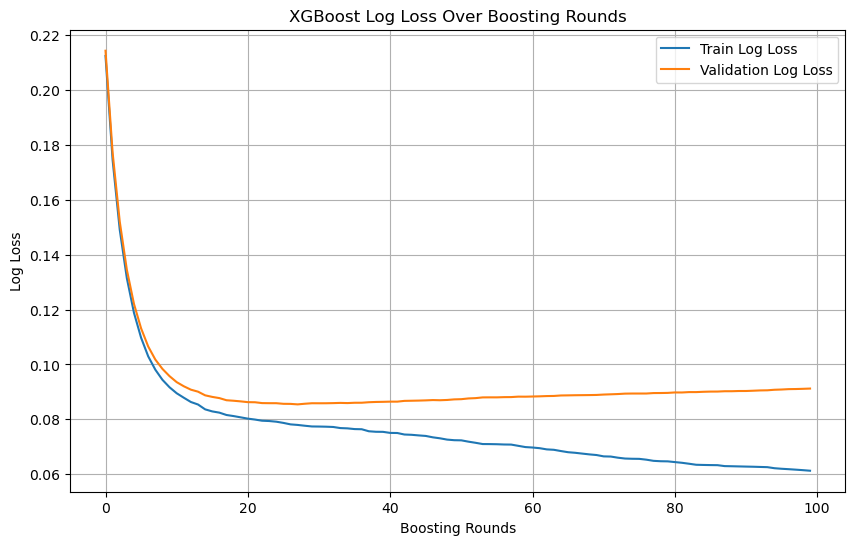

Results for train
train accuracy = 0.9755
train precision = 0.9883
train recall = 0.7319
train f1 = 0.8410
------------------------------------------
Results for validation
validation accuracy = 0.9677
validation precision = 0.9395
validation recall = 0.6781
validation f1 = 0.7877
------------------------------------------
Results for test
test accuracy = 0.9713
test precision = 0.9484
test recall = 0.7146
test f1 = 0.8151
------------------------------------------


In [11]:
exp_1(data= transformed_data, target="diabetes")

**Observation**
When trained on default hyper-parameter, model is clearly overfitting to training set. This is clear from the separation between training and validation error

# Test 2

**Reduce number of estimators to 30 to aviod over-fitting**

[0]	validation_0-logloss:0.21241	validation_1-logloss:0.21431
[29]	validation_0-logloss:0.07739	validation_1-logloss:0.08585


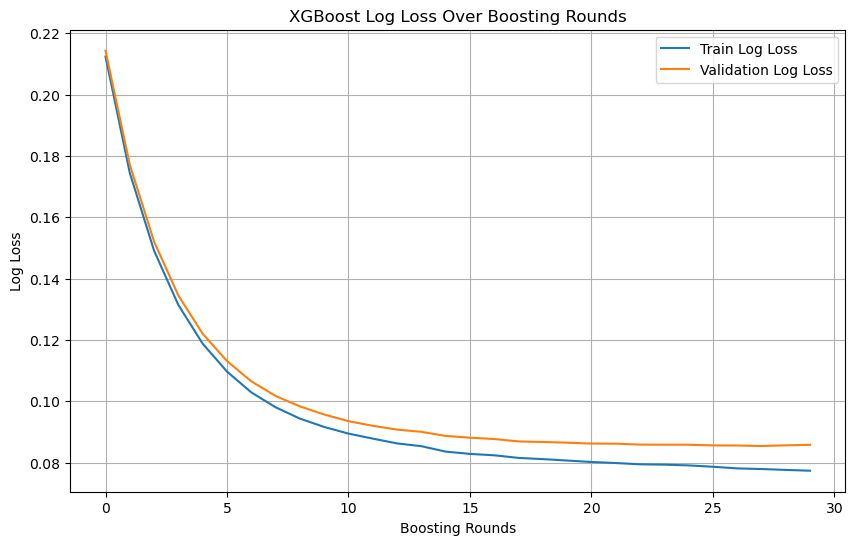

Results for train
train accuracy = 0.9717
train precision = 0.9849
train recall = 0.6908
train f1 = 0.8121
------------------------------------------
Results for validation
validation accuracy = 0.9690
validation precision = 0.9717
validation recall = 0.6692
validation f1 = 0.7926
------------------------------------------
Results for test
test accuracy = 0.9725
test precision = 0.9764
test recall = 0.7064
test f1 = 0.8197
------------------------------------------


In [12]:
exp_1(data= transformed_data, target="diabetes", param_dict={"n_estimators": 30})

**Observation**
- poor recall as a result of imbalance in dataset

# Test 3

**Adjust class weight (scale_pos_weight hyper-paramer) to account for imbalance**

[0]	validation_0-logloss:0.31611	validation_1-logloss:0.31759
[29]	validation_0-logloss:0.10504	validation_1-logloss:0.11338


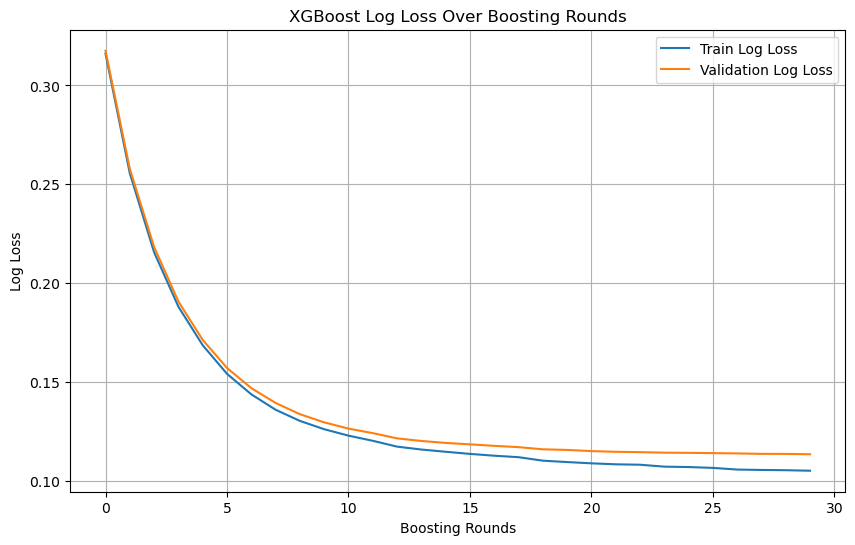

Results for train
train accuracy = 0.9578
train precision = 0.7321
train recall = 0.8241
train f1 = 0.7754
------------------------------------------
Results for validation
validation accuracy = 0.9539
validation precision = 0.7147
validation recall = 0.7978
validation f1 = 0.7540
------------------------------------------
Results for test
test accuracy = 0.9551
test precision = 0.7176
test recall = 0.8119
test f1 = 0.7618
------------------------------------------


In [13]:
exp_1(data= transformed_data, target="diabetes", param_dict={"n_estimators": 30, "scale_pos_weight": 4 })

# Test 4

**Adjust tree depth in attempt to imporve the general performance**

[0]	validation_0-logloss:0.31611	validation_1-logloss:0.31759
[49]	validation_0-logloss:0.09838	validation_1-logloss:0.11301


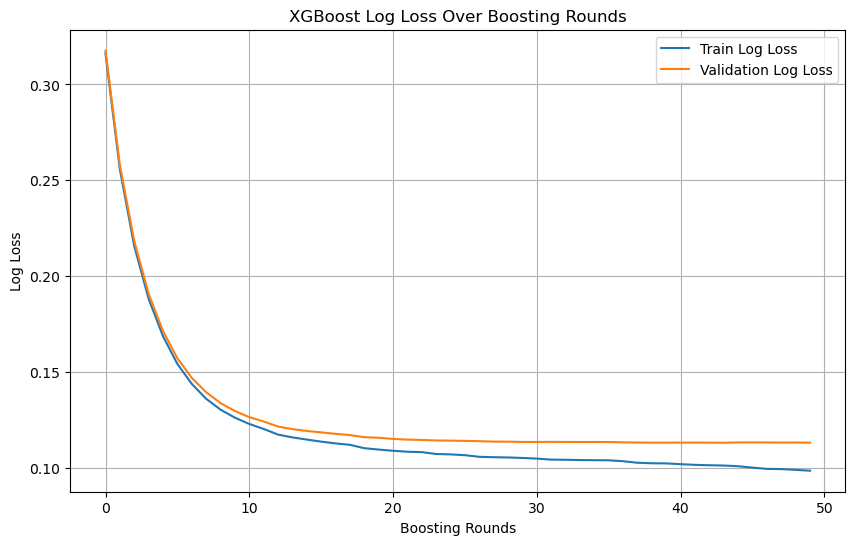

Results for train
train accuracy = 0.9588
train precision = 0.7313
train recall = 0.8438
train f1 = 0.7835
------------------------------------------
Results for validation
validation accuracy = 0.9518
validation precision = 0.6994
validation recall = 0.7972
validation f1 = 0.7451
------------------------------------------
Results for test
test accuracy = 0.9533
test precision = 0.7038
test recall = 0.8154
test f1 = 0.7555
------------------------------------------


In [14]:
exp_1(data= transformed_data, target="diabetes", param_dict={"n_estimators": 50, "scale_pos_weight": 4, "max_depth": 6})

# Test 5 Grid Search

In [15]:
# write a function to perform grid search
def perform_grid_search(data, target, param_grid):
    
    # split data to train, test and evaluation set
    X_data = data.drop([target], axis=1)
    y_data = data[target]
    X_train_val, X_test, y_train_val, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

    

    # Initialize the XGBoost model
    xgb = XGBClassifier()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='recall', cv=3, verbose=2, n_jobs=-1)

    # Perform the grid search
    grid_search.fit(X_train, y_train)

    # Return the best parameters
    return grid_search.best_params_

In [16]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [30, 50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    "scale_pos_weight": [4]
}

In [17]:
best_param = perform_grid_search(data= transformed_data, target="diabetes", param_grid=param_grid)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [18]:
best_param

{'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 100,
 'scale_pos_weight': 4,
 'subsample': 1.0}

[0]	validation_0-logloss:0.36734	validation_1-logloss:0.36862
[50]	validation_0-logloss:0.11213	validation_1-logloss:0.11592
[99]	validation_0-logloss:0.10754	validation_1-logloss:0.11332


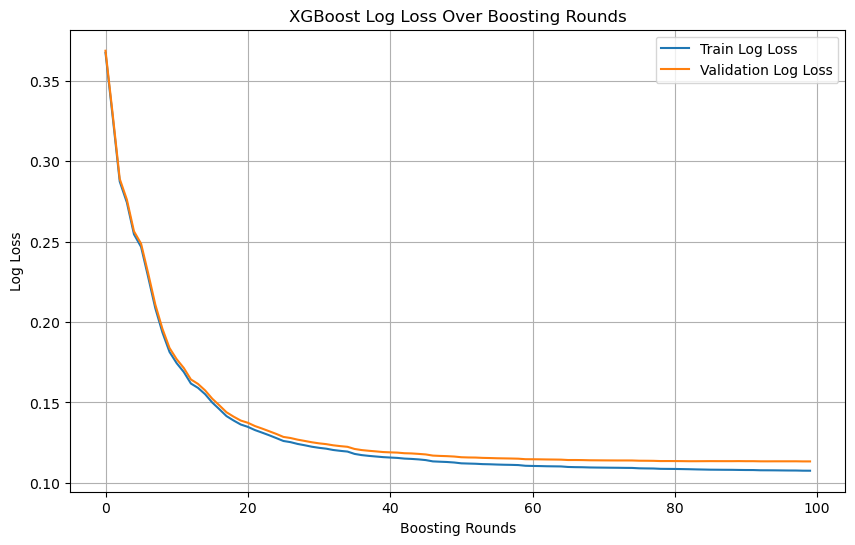

Results for train
train accuracy = 0.9562
train precision = 0.7222
train recall = 0.8211
train f1 = 0.7685
------------------------------------------
Results for validation
validation accuracy = 0.9524
validation precision = 0.7015
validation recall = 0.8037
validation f1 = 0.7491
------------------------------------------
Results for test
test accuracy = 0.9547
test precision = 0.7137
test recall = 0.8143
test f1 = 0.7607
------------------------------------------


In [19]:
exp_1(data= transformed_data, target="diabetes", param_dict=best_param)

**Results shows good recall and precision without overfitting heavily**

# Train final model using the best hyper-parameters

In [21]:
best_param = {'colsample_bytree': 0.8,
                     'learning_rate': 0.2,
                     'max_depth': 3,
                     'n_estimators': 100,
                     'scale_pos_weight': 4,
                     'subsample': 1.0}

In [22]:
def train_final_model(data, target, param_dict = {}):
    # Split data into X and y
    X_data = data.drop([target], axis=1)
    y_data = data[target]

    # Split data into train and final test set
    X_train_val, X_test, y_train_val, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

    # Initialize classifier
    clf = XGBClassifier(**param_dict)

    # Train the model
    clf.fit(X_train_val, y_train_val)

    # Extract feature importance
    feature_importances = clf.feature_importances_

    # Create a DataFrame to hold feature importances
    importance_df = pd.DataFrame({
        'Feature': X_train_val.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Feature Importance')
    plt.show()

    return importance_df, clf

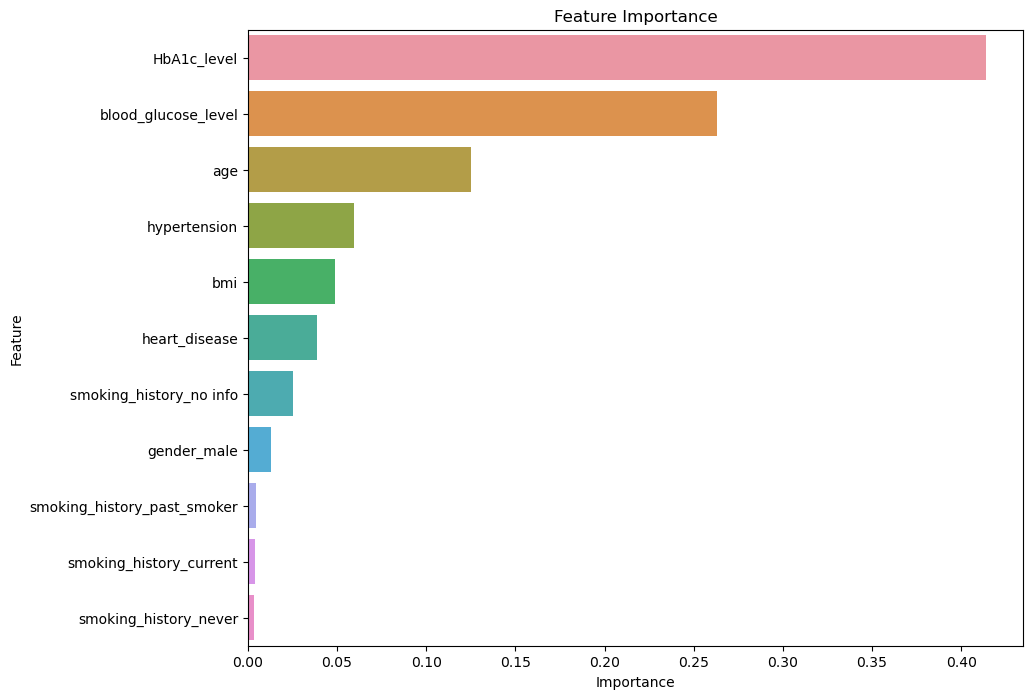

In [23]:
feature_importance, model = train_final_model(data= transformed_data, target="diabetes", param_dict=best_param)

In [24]:
feature_importance

,Feature,Importance
4,HbA1c_level,0.413913
5,blood_glucose_level,0.262812
0,age,0.125335
1,hypertension,0.059678
3,bmi,0.048676
2,heart_disease,0.038815
9,smoking_history_no info,0.025541
6,gender_male,0.012947
10,smoking_history_past_smoker,0.004716
7,smoking_history_current,0.003894


**Top Features:**
- HbA1c_level: This feature has the highest importance by a significant margin, indicating that it plays a critical role in the model's predictions.
- blood_glucose_level: This is the second most important feature, contributing significantly to the model's decisions.
- age: The third most important feature, suggesting that age has a meaningful impact on the prediction.

**Moderately Important Features:**
- hypertension: This feature also contributes significantly but less than the top three features.
- bmi: BMI is moderately important, implying it has some impact on the predictions but is not as crucial as the top features.
- heart_disease: This feature has a smaller, yet noticeable, contribution to the model’s prediction.

**Less Important Features:**
- smoking_history_no info and gender_male: These features have relatively low importance, meaning they have limited influence on the model’s prediction.
- smoking_history_past_smoker, smoking_history_current, and smoking_history_never: These features have very low importance, indicating that the model does not rely heavily on smoking history for its predictions.